In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [3]:
data = yf.download('AAPL', start='2010-01-01', end='2022-01-01')['Close'].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


#### Normalize the data

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

#### Define function to create dataset

In [5]:
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

#### Define the time step

In [6]:
time_step = 100

#### Create the dataset with time steps

In [7]:
X, y = create_dataset(scaled_data, time_step)

#### Reshape X to be [samples, time steps, features]

In [8]:
X = X.reshape(X.shape[0], X.shape[1], 1)

#### Splitting the data into training and testing sets

In [9]:
split_ratio = 0.8

In [10]:
split_index = int(split_ratio * len(X))

In [11]:
X_train, X_test = X[:split_index], X[split_index:]

In [12]:
y_train, y_test = y[:split_index], y[split_index:]

#### Build the LSTM model

In [13]:
model = Sequential()

In [15]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

In [16]:
model.add(LSTM(units=50))

In [17]:
model.add(Dense(units=1))

#### Compile the model

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Train the model

In [19]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - loss: 0.0044 - val_loss: 0.0014
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 1.2992e-04 - val_loss: 0.0026
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 6.4493e-05 - val_loss: 0.0036
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - loss: 7.0662e-05 - val_loss: 0.0035
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 6.5118e-05 - val_loss: 0.0040
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 6.8305e-05 - val_loss: 0.0027
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 6.9124e-05 - val_loss: 0.0032
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 6.5549e-05 - val_loss: 0.0046
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 5.9442e-05 - val_loss: 0.0042
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 5.4338e-05 - val_loss: 0.0035
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 5.1047e-05 - val_loss: 0.0046


### Plot training and validation loss

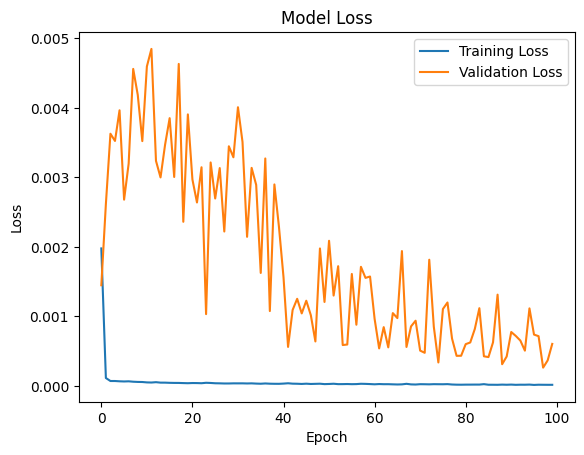

In [31]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')  # Add label for training loss plot
plt.plot(history.history['val_loss'], label='Validation Loss')  # Add label for validation loss plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()  # This line creates the legend based on the provided labels
plt.title('Model Loss')  # Set the title of the plot
plt.show()

### Predicting the stock prices

In [32]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step


### Evaluating the model

In [34]:
rmse = np.sqrt(mean_squared_error(data[split_index+time_step+1:], predictions))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 4.851345025086304


# Plot the results

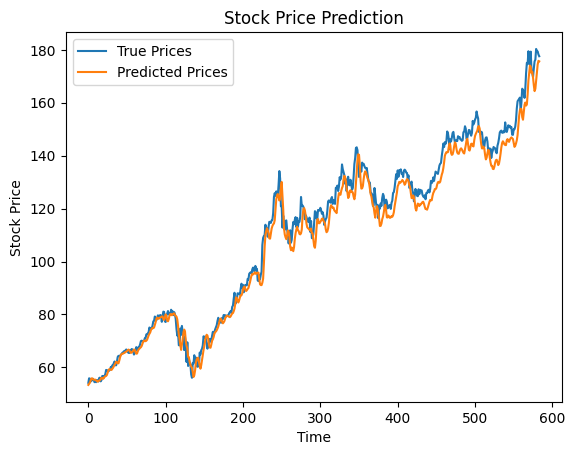

In [35]:
plt.plot(data[split_index+time_step+1:], label='True Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()